# **MITgcm LLC4320 文件说明**
### *Created by LiuZhenbo 2024.11.04*

## 一、数据简要说明

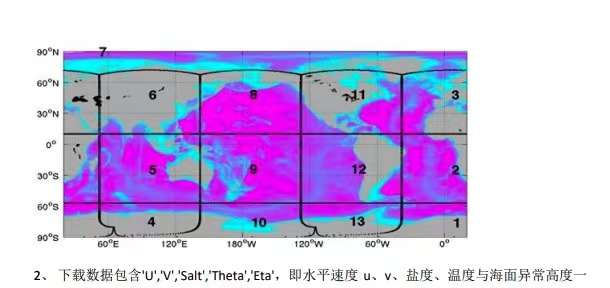

##### 上图表示LLC4320模型的数据分块情况，全球分为多个面（face），每个face里有**4320*4320**个网格点
##### LLC4320的网格点在**中低纬度**较为均匀，网格接近于矩阵。在中高纬度开始变形
###### 全球数据分为13个face，分别标记为1到13。这种分块方式常用于三维网格的分布式存储与处理，特别适用于高分辨率全球模型，如LLC4320。每个面代表一个独立的经纬度区域，数据包括速度（水平速度 U、V、W）、盐度（Salt）、温度（Theta）和海面高度异常（Eta）等变量。通过这种分块设计，LLC4320模型能够高效地处理全球范围内的多维海洋变量，支持更精细的海洋过程分析。
##### LLC4320**垂向分为90层**，全球13个face的垂向网格分布都是一致的。

## 二、垂向网格

##### 垂向网格有两个文件，分别为层厚(thk)和每一层的深度(dpt)

In [3]:
import scipy.io as sio

In [1]:
# -*- coding: utf-8 -*-
# LLC4320垂向网格，gri_dir为垂向网格的相对路径
gri_dir = './grid/'

In [13]:
# 读取垂向网格数据
# Matlab的v7.0的mat文件需要使用scipy.io.loadmat读取
# dep为深度数据，thk为层厚数据
# 另注，Matlab的v7.3的mat文件本质上是一种hdf5文件，需要使用h5py.File读取
dep = sio.loadmat(gri_dir + 'dpt90.mat')
thk = sio.loadmat(gri_dir + 'thk90.mat')
dep, thk
# 另注，Matlab的v7.3的mat文件本质上是一种hdf5文件，需要使用h5py.File读取
# import h5py
# f = h5py.File('dpt90.mat', 'r')
# dep = f['dpt90']

({'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 27 09:57:53 2023',
  '__version__': '1.0',
  '__globals__': [],
  'dpt90': array([[5.000000e-01, 1.570000e+00, 2.790000e+00, 4.185000e+00,
          5.780000e+00, 7.595000e+00, 9.660000e+00, 1.201000e+01,
          1.468000e+01, 1.770500e+01, 2.112500e+01, 2.499000e+01,
          2.934500e+01, 3.424000e+01, 3.972500e+01, 4.585500e+01,
          5.269000e+01, 6.028000e+01, 6.868500e+01, 7.796500e+01,
          8.817500e+01, 9.937000e+01, 1.116000e+02, 1.249150e+02,
          1.393650e+02, 1.549900e+02, 1.718250e+02, 1.899000e+02,
          2.092350e+02, 2.298550e+02, 2.517700e+02, 2.749850e+02,
          2.995050e+02, 3.253200e+02, 3.524200e+02, 3.807900e+02,
          4.104100e+02, 4.412550e+02, 4.733050e+02, 5.065400e+02,
          5.409350e+02, 5.764650e+02, 6.131100e+02, 6.508550e+02,
          6.896850e+02, 7.295950e+02, 7.705850e+02, 8.126600e+02,
          8.558350e+02, 9.001350e+02, 9.455950e+02, 9.9226

In [11]:
dep_data = dep['dpt90']
thk_data = thk['thk90']

## 三、水平网格

##### 水平网格的详细说明见grid.h文件
 当使用LLC4320下载代码下载数据时，将会自带网格数据，水平网格可以直接在其内部读取出来（垂向网格也存在，这里为了便于说明，提前把垂向网格拿出来解释了）

###### dxC     :: Cell center separation in X across western cell wall (m)
###### dxG     :: Cell face separation in X along southern cell wall (m)
###### dxF     :: Cell face separation in X thru cell center (m)
###### dxV     :: V-point separation in X across south-west corner of cell (m)
###### dyC     :: Cell center separation in Y across southern cell wall (m)
###### dyG     :: Cell face separation in Y along western cell wall (m)
###### dyF     :: Cell face separation in Y thru cell center (m)
###### dyU     :: U-point separation in Y across south-west corner of cell (m)

In [ ]:
# 在后文中，你可以看到u、v等数据他们的下标是i, i_g, j, j_g等不同的。这样的区别是因为他们是定义在不同网格位置上的。
ds
# j_g: y_grid_index_at_v_location
# j: y-dimension of the t grid
# i_g: x_grid_index_at_u_location

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 1, k_u: 1,
              k_l: 1, k_p1: 2, time: 10312)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0
  * k_u      (k_u) int64 0
  * k_l      (k_l) int64 0
  * k_p1     (k_p1) int64 0 1
    niter    (time) int64 ...
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-11-15T15:00:00
Data variables:
    V        (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 1, 3, 4320, 4320), meta=np.ndarray>

## 四、LLC4320数据简单下载

#### 我本地的python虚拟环境使用的是python=3.8版本，据说其他版本的python可能会有一些问题，但并不确定

**LLC4320数据需要使用xmitgcm数据包**，该数据包也会对xarray和netcdf4可能有所依赖

In [23]:
# pip install xmitgcm
# pip install xarray
# 先行使用pip安装xmitgcm和xarray，我这里已经安装，故注释掉

##### LLC4320/2160数据可以使用xmitgcm这个函数包里的llcreader模块读取

In [27]:
from xmitgcm import llcreader

# 创建 LLC4320 模型的读取器
model = llcreader.ECCOPortalLLC4320Model()
# 读取一个变量，比如 'U'（东向速度分量）
ds = model.get_dataset(varnames=['U', 'V'], k_levels=[0])
# 参数说明：varnames为变量名列表，有U, V, W, Theta, Salt, Eta, Phi等可选
# k_levels为垂向层数列表，从0开始，0为海表，1为第一层，以此类推
# 这里的k_levels=[0]表示只读取海表层的数据
ds
# 输出的数据集包含了经度、纬度、时间、东向速度分量等数据
# 可以在ds里看到，这样的读取方式获取了全球的13face的数据，所有时间的，这里只是为了演示，实际使用时可以根据需要选择读取的face和时间

/opt/anaconda3/envs/data/lib/python3.8/site-packages/xmitgcm/llcreader/llcmodel.py:406: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  return {vname: _facets_to_faces(data, nfaces)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xmitgcm/llcreader/llcmodel.py:406: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the lar

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 1, k_u: 1,
              k_l: 1, k_p1: 2, time: 10312)
Coordinates: (12/42)
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0
    ...       ...
    XG       (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    YG       (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dxV      (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    dyU      (face, j_g, i_g) float32 dask.array<chunksize=(3, 4320, 4320), meta=np.ndarray>
    Zl       (k_l) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    Zu       (k_u) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    U        (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 1, 3, 4320, 4320), meta=np.ndarray>
    V        (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 1, 3, 4320, 4320), meta=np.ndarray>

##### LLC4320数据的进一步切片

In [ ]:
# 上文中获取了全球的ds的数据，接下来详细说明如何获取局部的数据
from xmitgcm import llcreader
model = llcreader.ECCOPortalLLC4320Model()
ds = model.get_dataset(varnames=['V'],k_levels=[0])
region_slice = {'i':slice(0,4320),'j':slice(0,2200),'i_g':slice(0,4320),'j_g':slice(0,2200),'face':slice(1,2),'time':slice(0,2)}
region = ds.isel(**region_slice) # 也可以在ds里直接进行切片，这里涉及到python的和xarray的切片操作，略
# 参数说明：region_slice为切片参数，i、j、i_g、j_g、face、time分别为经度、纬度、经度网格、纬度网格、面、时间的切片
# slice为python内置函数，用于生成切片对象，slice(0,4320)表示选取该face里下标为0到4320的切片，时间和face同理
# 另注，这里的face=slice(1,2)表示选取第1个face的数据，因为python的下标是从0开始的
region
# 切片结果见region，包含了经度、纬度、时间、V速度分量等数据

/opt/anaconda3/envs/data/lib/python3.8/site-packages/xmitgcm/llcreader/llcmodel.py:406: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  return {vname: _facets_to_faces(data, nfaces)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xmitgcm/llcreader/llcmodel.py:406: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the lar

<xarray.Dataset>
Dimensions:  (face: 1, i: 4320, i_g: 4320, j: 2200, j_g: 2200, k: 1, k_u: 1,
              k_l: 1, k_p1: 2, time: 2)
Coordinates: (12/42)
  * face     (face) int64 1
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 2193 2194 2195 2196 2197 2198 2199
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 2193 2194 2195 2196 2197 2198 2199
  * k        (k) int64 0
    ...       ...
    XG       (face, j_g, i_g) float32 dask.array<chunksize=(1, 2200, 4320), meta=np.ndarray>
    YG       (face, j_g, i_g) float32 dask.array<chunksize=(1, 2200, 4320), meta=np.ndarray>
    dxV      (face, j_g, i_g) float32 dask.array<chunksize=(1, 2200, 4320), meta=np.ndarray>
    dyU      (face, j_g, i_g) float32 dask.array<chunksize=(1, 2200, 4320), meta=np.ndarray>
    Zl       (k_l) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    Zu       (k_u) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables:
    V        (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 1, 1, 2200, 4320), meta=np.ndarray>

In [ ]:
# 将读取的数据保存为nc文件
region.to_netcdf('region.nc')
# 参数说明：'region.nc'为保存的文件名，可以自定义
# region在此处为上文中的切片结果，其本质上是对nasa服务器上的数据的预索引，不会真正下载数据
# 所以查看切片索引的操作十分快速，不会占用太多内存
# 只有在调用to_netcdf时才会真正下载数据并保存为nc文件，所以这里的region.to_netcdf('region.nc')是一个耗时操作

## **如何确定自己的切片范围？i和j的范围**
我的个人做法是用上述代码，先下载一个带有网格的数据。然后以此确定i和j的范围。然后再下载不带有网格的数据

## 五、LLC4320数据复杂下载

##### 在上文下载的nc文件里，会有大量的网格数据存在，如dxC等数据。在实际下载中，可以去掉这样的网格数据，使得最终的nc文件体积较小

**2024-1104更新**

In [ ]:
# 在get_dataset中，还可以设置read_grid和grid_vars_to_coords参数，用于读取网格数据
# 如果read_grid=True，将会读取网格数据，包括经度、纬度、面、网格中心距离等
# 如果grid_vars_to_coords=True，将会将网格数据转换为坐标数据
# 如果选择为False，那么最后的nc文件体积会小很多，但是无法直接使用xarray的坐标功能
# 我之前没有发现这个参数，我是手动去除掉这些网格数据的，这里提供了一个更方便的方法
ds = model.get_dataset(varnames=['V'],k_levels=[0], read_grid=False, grid_vars_to_coords=False)
ds

/opt/anaconda3/envs/data/lib/python3.8/site-packages/xmitgcm/llcreader/llcmodel.py:406: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  return {vname: _facets_to_faces(data, nfaces)
/opt/anaconda3/envs/data/lib/python3.8/site-packages/xmitgcm/llcreader/llcmodel.py:406: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the lar

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, i_g: 4320, j: 4320, j_g: 4320, k: 1, k_u: 1,
              k_l: 1, k_p1: 2, time: 10312)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * k        (k) int64 0
  * k_u      (k_u) int64 0
  * k_l      (k_l) int64 0
  * k_p1     (k_p1) int64 0 1
    niter    (time) int64 ...
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-11-15T15:00:00
Data variables:
    V        (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 1, 3, 4320, 4320), meta=np.ndarray>

#### **code见DownLoadLLc4320_byLiuZB_Serial.py文件**
虽然此code可能需要进行更新，但是在此对该code进行简要说明

##### **该code为逐小时下载从开始时间到结束时间，*每个小时*的数据，并保存为*没有经纬度网格的*nc文件。下载好的数据以4320模式数据第几个小时数+实际对应的时间命名**

##### **download_and_monitor 函数**：
*主要下载函数*

该函数用于下载指定时间 (hour) 和区域 (face 和坐标范围) 的LLC4320模型数据。
它会创建文件夹以保存下载的数据，并通过参数 params 中的坐标范围和 face 来设置下载的区域。
在下载过程中，它会尝试多次（最大重试次数为 max_retries）下载，以应对网络问题或其他故障。
成功下载后，会将数据以 NetCDF 格式存储到本地文件。如果遇到错误，会进行记录并在一定时间后重试，直到达到最大重试次数。
函数返回下载是否成功的状态、下载耗时和错误信息（如果有）。

##### **download_data 函数**：
该函数用于管理多小时段的下载任务，按照 start_hour 到 end_hour 的时间范围依次下载数据。
它会依次调用 download_and_monitor 函数进行数据下载，并将每个小时的数据下载状态、耗时、错误原因记录到一个进度文件 Face{face}_download_progress.txt 中。
这个函数主要负责循环执行各个时间点的下载任务，提供一个顺序的下载流程。

##### **主程序逻辑 (if __name__ == '__main__':)**：
主程序逻辑在 __main__ 入口中执行，用于配置和启动数据下载。
它首先使用 llcreader 模块从 ECCO 数据门户中获取 LLC4320 模型数据，并定义要提取的深度层数 k_levels。
然后根据预定义的 face 值来设置下载参数（区域坐标范围 i_start, i_end, j_start, j_end）。
最后，调用 download_data 函数，按照指定的时间范围 (start_hour 到 end_hour) 和下载参数执行数据下载。
